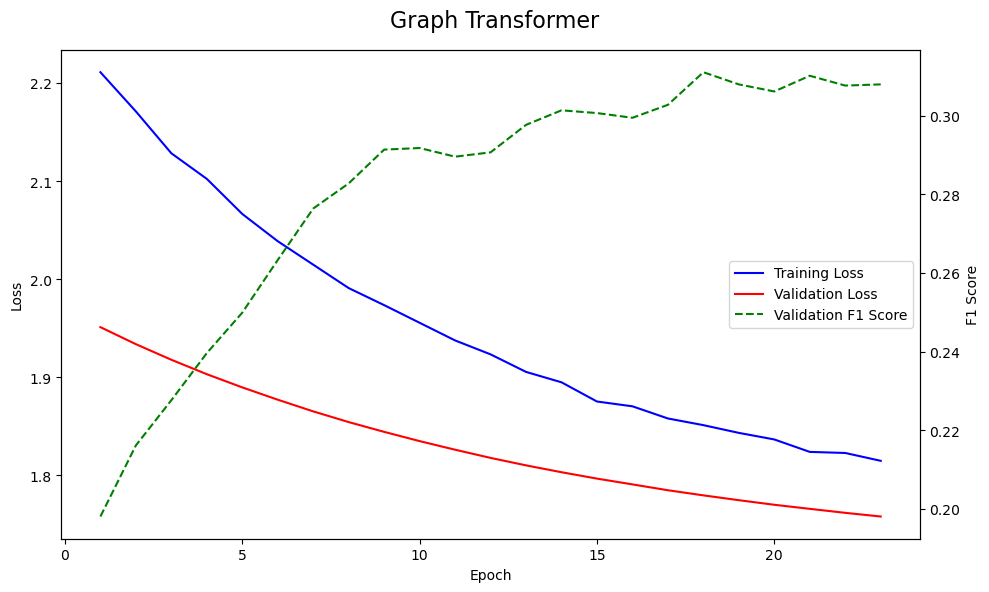

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt

def parse_log_file(log_file):
    # Regex patterns to find the relevant information
    epoch_pattern = r"Epoch (\d+)"
    train_loss_pattern = r"Train Loss: ([\d.]+)"
    val_loss_pattern = r"Validation Cross-Entropy Loss: ([\d.]+)"
    val_f1_pattern = r"Val F1 Score: ([\d.]+)"

    epochs, train_losses, val_losses, val_f1_scores = [], [], [], []

    with open(log_file, 'r') as file:
        for line in file:
            # Search for patterns in each line
            epoch_match = re.search(epoch_pattern, line)
            train_loss_match = re.search(train_loss_pattern, line)
            val_loss_match = re.search(val_loss_pattern, line)
            val_f1_match = re.search(val_f1_pattern, line)

            # If a pattern is found, append the data to the respective list
            if epoch_match:
                epochs.append(int(epoch_match.group(1)))
            if train_loss_match:
                train_losses.append(float(train_loss_match.group(1)))
            if val_loss_match:
                val_losses.append(float(val_loss_match.group(1)))
            if val_f1_match:
                val_f1_scores.append(float(val_f1_match.group(1)))

    # Creating a DataFrame from the extracted data
    data = pd.DataFrame({
        'Epoch': epochs,
        'Train Loss': train_losses,
        'Validation Loss': val_losses,
        'Validation F1 Score': val_f1_scores
    })

    return data

# As an example, let's assume we have a log file named 'training_log.txt'
log_data = parse_log_file('gnn_training_log.txt') # Uncomment this when using with a real log file

def plot_combined_metrics(data):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Setting the title and labels
    fig.suptitle('Graph Transformer', fontsize=16)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')

    # Plotting Training and Validation Loss on the left y-axis
    ln1 = ax1.plot(data['Epoch'], data['Train Loss'], label='Training Loss', color='blue')
    ln2 = ax1.plot(data['Epoch'], data['Validation Loss'], label='Validation Loss', color='red')
    
    # Setting up the right y-axis for F1 Score
    ax2 = ax1.twinx()
    ax2.set_ylabel('F1 Score')
    ln3 = ax2.plot(data['Epoch'], data['Validation F1 Score'], label='Validation F1 Score', color='green', linestyle='--')

    # Combining the legends
    lns = ln1 + ln2 + ln3
    labels = [l.get_label() for l in lns]
    ax1.legend(lns, labels, loc='center right')

    # Adjusting layout for clarity
    fig.tight_layout()

    # Display the plot
    plt.show()

plot_combined_metrics(log_data)

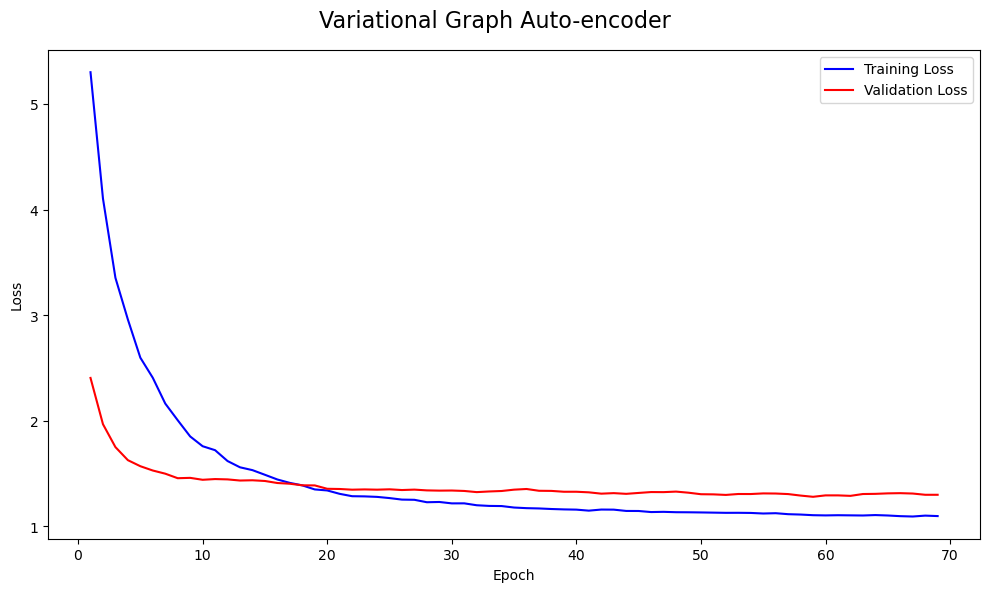

In [9]:
def parse_log_file_v2(log_file):
    # Regex patterns to find the relevant information
    epoch_pattern = r"Epoch: (\d+)"
    train_loss_pattern = r"Loss: ([\d.]+)"
    val_loss_pattern = r"Val Loss: ([\d.]+)"

    epochs, train_losses, val_losses = [], [], []

    with open(log_file, 'r') as file:
        for line in file:
            # Search for patterns in each line
            epoch_match = re.search(epoch_pattern, line)
            train_loss_match = re.search(train_loss_pattern, line)
            val_loss_match = re.search(val_loss_pattern, line)

            # If a pattern is found, append the data to the respective list
            if epoch_match:
                epochs.append(int(epoch_match.group(1)))
            if train_loss_match:
                train_losses.append(float(train_loss_match.group(1)))
            if val_loss_match:
                val_losses.append(float(val_loss_match.group(1)))

    # Creating a DataFrame from the extracted data
    data = pd.DataFrame({
        'Epoch': epochs,
        'Train Loss': train_losses,
        'Validation Loss': val_losses
    })

    return data

def plot_loss_metrics(data):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Setting the title and labels
    #fig.suptitle('Graph Auto-encoder', fontsize=16)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')

    # Plotting Training and Validation Loss
    ln1 = ax1.plot(data['Epoch'], data['Train Loss'], label='Training Loss', color='blue')
    ln2 = ax1.plot(data['Epoch'], data['Validation Loss'], label='Validation Loss', color='red')
    
    # Combining the legends
    lns = ln1 + ln2
    labels = [l.get_label() for l in lns]
    ax1.legend(lns, labels, loc='upper right')

    # Adjusting layout for clarity
    fig.tight_layout()

    # Display the plot
    plt.show()

log_data_v2 = parse_log_file_v2("gae_training_log.txt")
plot_loss_metrics(log_data_v2)